In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

Step 1: Data

Step 2: Build model

Step 3: Infer hidden variables

Step 4: Predict and explore

## Gaussian distribution

Variance: $$\mu^2 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2$$

standard deviation: $$\mu = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2}$$

or for sample standard deviation: $$s = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(x_i - \bar{x})^2}$$

probability density equation:

## $$y = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

where:

$\mu$ = mean

$\sigma$ = standard deviation

$\sigma^2$ = variance

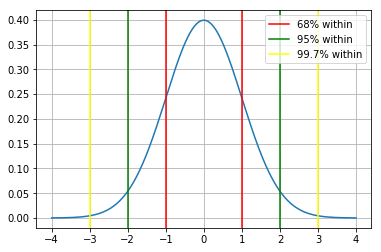

In [3]:
x = np.linspace(-4, 4, 2001)

s = 1

m = 0

y = (1/(s*np.sqrt(2*np.pi)))*np.power(np.e, -(((x - m)**2)/2*s**2))

plt.plot(x, y)

plt.axvline(s, color='red', label='68% within')
plt.axvline(-s, color='red')

plt.axvline(2*s, color='green', label='95% within')
plt.axvline(-2*s, color='green')

plt.axvline(3*s, color='yellow', label='99.7% within')
plt.axvline(-3*s, color='yellow')

plt.legend()
plt.grid(True)
plt.show()

68% of values are within 1 $\sigma$ of the mean

95% of values are within 2 $\sigma$ of the mean

99.7% of values are within 3 $\sigma$ of the mean

## GAUSSIAN DISTRIBUTION (MULTIVARIATE)

probability density equation:

## $$p(x|\mu,\Sigma) := \frac{1}{(2\pi)^{\frac{d}{2}}\sqrt{det(\Sigma)}}exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$

d = number of features and dimensions

x = d dimensional input vector

$\mu$ = x's mean (d dimensional)

$\Sigma$ = $d\times d$ dimensional positive definite matrix covarient

it is non-negative and integrates to 1

#### The expectation $E=\mu$

### $$\mathbb{E}[x] = \int_{\mathbb{R^d}} x p(x|\mu, \Sigma)dx = \mu$$

#### The Covarient $Cov(x) = \Sigma$

$\Sigma$ represents the covarience matrix of the gaussian

we are using the varience-covarience matrix instead of standard deviation

because it shows how variables co-vary when more variables and dimensions are involved

### $$Cov(x) = 
\mathbb{E}[(x − \mathbb{E}[x])(x − \mathbb{E}[x])^T] = \mathbb{E}[xx^T] − \mathbb{E}[x]\mathbb{E}[x]^T = \Sigma$$

sig = [[1, 0], [0, 2]] 
mu = [0, 0]


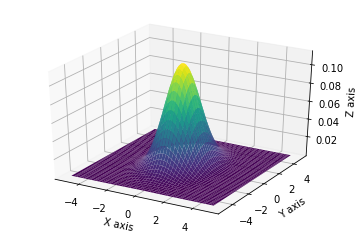

In [13]:
#Parameters to set
mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 2

variance_xy = 0
variance_yx = 0


#Create grid and multivariate normal
x = np.linspace(-5,5,500)
y = np.linspace(-5,5,500)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

mu = [mu_x, mu_y]
sig = [[variance_x, variance_xy], [variance_yx, variance_y]]

rv = multivariate_normal(mu, sig)

print 'sig =', sig, '\nmu =', mu

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Probalistic model (step 2)

Set of probability distributions, $p(x|\theta)$

We pick the distribution family, $p(.)$

but dont know the parameter $\theta$

eg. for gaussian distribution $p(x|\theta)$, $\theta = \{\mu, \Sigma\}$

#### We are assuming it's independent and identically distributed (iid)

Written as:

$$x_i \overset{iid}{\tilde{}} p(x|θ), i = 1,..., n$$

With density as $p(x|\theta)$, joint desity decomposes to:

$$p(x_1,..., x_n|\theta) = \prod_{i=1}^{n}p(x_i|\theta)$$

we can only do this as all data is independant and also identically distributed

## MAXIMUM LIKELIHOOD ESTIMATION (step 3)

We need to optimize $\theta$

Maximum likelihood maximizes the maximum likelihood function:

$$\hat{\theta}_{ML} := \arg  \underset{\theta}{\max} p(x_1, . . . , x_n|\theta)$$

analytic criterion for this maximum likelihood estimator is:

$$\triangledown_{\theta}\prod^n_{i=1}p(x_i|\theta) = 0$$

so the gradient needs to be 0, at a peak where there is no further improvement

#### Logarithm Trick

calculating $\triangledown_{\theta}\prod^n_{i=1}p(x_i|\theta) = 0$ can be complicated

so we use the fact logarithm is  monotonically (in order) increasing on $\mathbb{R}_+$

and use the equality:

$$\ln\left(\prod_if_i\right) = \sum_i\ln(f_i)$$

taking the logarithm doesnt change the location of the min or max

$$\underset{y}{\max}\ln g(y) \not= \underset{y}{\max} g(y)$$ The value changes

$$\arg \underset{y}{\max}\ln g(y) = \arg \underset{y}{\max}g(y)$$ The location does not change

In [5]:
f = np.array([1,2,3,4])

a = np.log(np.prod(f))

b = np.sum(np.log(f))

print a, b

3.17805383035 3.17805383035


### Maximum Likelihood and Logarithm trick

$$\hat{\theta}_{ML} = \arg \underset{\theta}{\max}\prod^n_{i=1}p(x_i|\theta)$$

$$= \arg \underset{\theta}{\max}\ln\left(\prod^n_{i=1}p(x_i|\theta)\right)$$

$$= \arg \underset{\theta}{\max}\sum^n_{i=1}\ln p(x_i|\theta)$$

$$\triangledown_{\theta}\sum^n_{i=1}\ln p(x_i|\theta) = 0$$

$$\sum^n_{i=1}\triangledown_{\theta}\ln p(x_i|\theta) = 0$$

### Analysing the maximum likelihood

Depending on the model, we  can solve it:

analytically - through set of simple equations

numerically - iterating algorithm using different equations

approximately - when numerically converges to local optimal solution

## Applying this to our gaussian model

### Model:

Gaussian $\mathbb{R}^d$

unknown mean $\mu \in \mathbb{R}^d$

unknown covariance $\Sigma \in \mathbb{S}^d_{++}$ (positive definite d x d matrix)

#### Assume that:

$$x_i \overset{iid}{\tilde{}} p(x|\mu, \Sigma)$$

### Maximum Likelihood solution

have to solve:

$$\sum^n_{i=1}\triangledown_{(\mu, \Sigma)}\ln p(x_i|\mu, \Sigma) = 0$$

first, find gradient with respect to $\mu$

$$0 = \triangledown_{\mu}\sum^n_{i=1}\ln \frac{1}{\sqrt{(2\pi)^{d}|\Sigma|}}exp\left(-\frac{1}{2}(x_i-\mu)^T\Sigma^{-1}(x_i-\mu)\right)$$

using $\ln(x\exp(y)) = \ln(x)+y$

$$0 = \triangledown_{\mu}\sum^n_{i=1}\ln \frac{1}{\sqrt{(2\pi)^{d}|\Sigma|}}+\left(-\frac{1}{2}(x_i-\mu)^T\Sigma^{-1}(x_i-\mu)\right)$$

using $\ln x^{y} = y\ln x$

$$0 = \triangledown_{\mu}\sum^n_{i=1}-\frac{1}{2}\ln(2\pi)^{d}|\Sigma|-\frac{1}{2}(x_i-\mu)^T\Sigma^{-1}(x_i-\mu)$$

$$0 = -\frac{1}{2}\sum^n_{i=1}\triangledown_{\mu}\left(x_i^T\Sigma^{-1}x_i-2\mu^T\Sigma^{-1}x_i+u^T\Sigma^{-1}\mu\right)$$

now find the derivative:

$$0 = -\Sigma^{-1}\sum^n_{i=1}(x_i-\mu)$$

and since $\Sigma$ is positive definite:

$$0 = \sum^n_{i=1}(x_i-\mu)$$

$$\hat{\mu}_{ML} = \frac{1}{n}\sum^n_{i=1}x_i$$

this solution doesnt depend on $\hat{\Sigma}_{ML}$ because its independant of $\Sigma$

Now lets take the gradient with respect to $\Sigma$

$$0 = \triangledown_{\Sigma}\sum^n_{i=1}-\frac{1}{2}\ln(2\pi)^{d}|\Sigma|-\frac{1}{2}(x_i-\mu)^T\Sigma^{-1}(x_i-\mu)$$

$$0 = -\frac{n}{2}\triangledown_{\Sigma}\ln|\Sigma|-\frac{1}{2}\triangledown_{\Sigma}trace\left(\Sigma^{-1}\sum^n_{i=1}(x_i-\mu)(x_i-\mu)^T\right)$$

$$0 = -\frac{n}{2}\Sigma^{-1}+\frac{1}{2}\Sigma^{-2}\sum^n_{i=1}(x_i-\mu)(x_i-\mu)^T$$

now plug in $\mu = \hat{\mu}_{ML}$

$$\hat{\Sigma}_{ML} = -\frac{n}{2}\Sigma^{-1}+\frac{1}{2}\Sigma^{-2}\sum^n_{i=1}(x_i-\hat{\mu}_{ML})(x_i-\hat{\mu}_{ML})^T$$


## So finally

So if we have data $x_1,..., x_n in \mathbb{R}^d$ that we hypothesize is i.i.d. Gaussian, the maximum likelihood values of the mean and covariance matrix are

$$\hat{\mu}_{ML} = \frac{1}{n}\sum^n_{i=1}x_i$$

$$\hat{\Sigma}_{ML} = -\frac{n}{2}\Sigma^{-1}+\frac{1}{2}\Sigma^{-2}\sum^n_{i=1}(x_i-\hat{\mu}_{ML})(x_i-\hat{\mu}_{ML})^T$$

## Problems

- We made an asumption about the model, multivariete gussian
- made an i.i.d assumption
- assumed that maximizing likelihood is best



In [6]:
x = np.linspace(1, 4, 4).reshape(2,2)
z = np.array([[a], [b]])
print x
print np.linalg.eigvals(x)
print z
print np.matmul(np.matmul(np.transpose(z), x), z)

[[ 1.  2.]
 [ 3.  4.]]
[-0.37228132  5.37228132]
[[ 3.17805383]
 [ 3.17805383]]
[[ 101.00026149]]


In [7]:
x = np.array([1, 2]).reshape(2).astype(np.float32)
mu = np.array([[4], [5]]).astype(np.float32)
sig = np.array([[12, 2], [5, 4]]).reshape(2,2).astype(np.float32)

sig_m = np.linalg.matrix_power(sig, -1)
mu_T = np.transpose(mu)

y = np.matmul(x, np.matmul(sig_m, mu)) + np.matmul(mu_T, np.matmul(sig_m, x))
y2 = 2*np.matmul(mu_T, np.matmul(sig_m, x))

print y, y2

print np.linalg.eigvals(sig)

print np.linalg.det(sig)

print y*(np.log((2*np.pi)**2*np.linalg.det(sig)))

[ 4.76315784] [ 4.99999952]
[ 13.09901905   2.90098047]
38.0
[ 34.83459473]


In [8]:
print np.linalg.matrix_power(np.array([[1, 2], [3, 4]]), 2)



[[ 7 10]
 [15 22]]


In [9]:
x = np.array([[1, 0], [0, 1]])
z = np.array([[0], [1]])

print np.all(np.linalg.eigvals(x) > 0)
print np.linalg.eigvals(x)
print np.matmul(np.matmul(np.transpose(z), x), z)

True
[ 1.  1.]
[[1]]


#### 